In [24]:
cd ..

/Users/annierumbles/Desktop/Coding/personal_work/1920-premier-league


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.stats import ttest_ind

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [27]:
df = pd.read_csv('data/merged_gw.csv')

In [93]:
def clean_names(df):
    names = df['name']
    names = names.apply(lambda x: re.sub(r'\d+$', '', x.replace('_', ' ')).strip())  
    df['name'] = names
    df.dropna(axis=0, inplace=True)
    return df

In [94]:
df = clean_names(df)
df.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron Cresswell,0,0,7,0,1.5,376,8,5,0,1.1,9.0,2019-08-10T11:30:00Z,90,11,0,0,0,0,1,0,23399,5.0,0.0,0.0,0,0,0,0,50,True,0,1
1,Aaron Lennon,0,0,3,0,0.0,430,3,0,0,0.2,2.0,2019-08-10T14:00:00Z,6,16,0,0,0,0,1,0,8105,0.0,3.0,0.0,1,0,0,0,50,True,0,1
2,Aaron Mooy,0,0,0,0,0.0,516,7,0,0,0.0,0.0,2019-08-10T14:00:00Z,0,18,0,0,0,0,1,0,16261,3.0,0.0,0.0,0,0,0,0,50,False,0,1
3,Aaron Ramsdale,0,0,11,0,0.0,494,2,1,0,1.0,9.8,2019-08-10T14:00:00Z,90,15,0,0,0,0,1,2,3091,1.0,1.0,0.0,2,0,0,0,45,True,0,1
4,Aaron Wan-Bissaka,0,2,34,1,16.1,122,9,0,0,4.9,30.4,2019-08-11T15:30:00Z,90,6,0,0,0,0,1,0,1879259,0.0,4.0,2.0,8,0,0,0,55,True,0,1


In [95]:
pre_shutdown = df[df['GW'] < 30]
post_shutdown = df[df['GW'] >= 30]

In [96]:
def search_df_for_player(player, df):
    return df[df['name']==player]

In [97]:
mr = search_df_for_player('Marcus Rashford', df)

In [98]:
mr.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.0,38.0,38.000000,38.0,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.210526,0.815789,17.500000,0.236842,14.728947,233.0,190.789474,0.763158,0.447368,7.139474,23.342105,69.605263,10.421053,0.0,0.052632,0.0,0.0,21.631579,0.0,1.306754e+06,1.131579,1.552632,33.289474,4.657895,-2645.026316,112782.736842,115427.763158,88.078947,0.078947,21.631579
std,0.474079,1.248897,19.086928,0.430851,11.972511,0.0,110.220457,0.819829,0.645038,5.492183,24.660984,34.534385,5.984808,0.0,0.226294,0.0,0.0,14.213471,0.0,4.613656e+05,1.017975,1.308958,30.407065,4.276120,221720.382012,122743.720989,152602.394626,2.497367,0.273276,14.213471
min,0.000000,0.000000,-4.000000,0.000000,0.000000,233.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,6.785700e+05,0.000000,0.000000,0.000000,0.000000,-649550.000000,0.000000,0.000000,84.000000,0.000000,1.000000
25%,0.000000,0.000000,0.250000,0.000000,4.750000,233.0,98.500000,0.000000,0.000000,2.975000,4.050000,65.750000,5.250000,0.0,0.000000,0.0,0.0,10.250000,0.0,8.845600e+05,0.000000,1.000000,9.000000,2.000000,-59902.250000,16948.750000,30622.000000,86.000000,0.000000,10.250000
50%,0.000000,0.000000,7.500000,0.000000,13.100000,233.0,190.000000,1.000000,0.000000,7.100000,11.600000,90.000000,10.000000,0.0,0.000000,0.0,0.0,19.500000,0.0,1.291361e+06,1.000000,1.000000,27.500000,2.000000,-5542.500000,71024.000000,59135.000000,89.000000,0.000000,19.500000
75%,0.000000,1.750000,32.750000,0.000000,23.250000,233.0,283.750000,1.000000,1.000000,11.425000,38.250000,90.000000,15.750000,0.0,0.000000,0.0,0.0,28.750000,0.0,1.606252e+06,2.000000,2.000000,47.250000,9.000000,114376.750000,163010.250000,106765.500000,90.000000,0.000000,28.750000
max,2.000000,3.000000,57.000000,1.000000,50.500000,233.0,376.000000,3.000000,2.000000,17.700000,77.800000,90.000000,20.000000,0.0,1.000000,0.0,0.0,47.000000,0.0,2.193838e+06,3.000000,5.000000,118.000000,13.000000,410968.000000,426190.000000,658055.000000,92.000000,1.000000,47.000000


In [99]:
all_players = df['name'].unique()

In [142]:
def make_player_stats_dict(list_of_players, stat, num_min):
    stat_dict = {player: df[df['name']==player][stat].sum() for player in all_players if df[df['name']==player][stat].sum() >= num_min}
    stat_dict_cumsum = {player: df[df['name']==player][stat].cumsum() for player in all_players if df[df['name']==player][stat].sum() >= num_min}
    return stat_dict, stat_dict_cumsum  

In [150]:
ten_plus, ten_plus_cumsum = make_player_stats_dict(all_players, 'goals_scored', 10)
fifteen_plus, fifteen_plus_cumsum = make_player_stats_dict(all_players, 'goals_scored', 15)
colors = ['firebrick', 'forestgreen', 'midnightblue', 'orangered', 'goldenrod', 'teal', 'mediumvioletred',
         'green', 'red', 'dodgerblue', 'slategrey', 'olive', 'mediumseagreen', 'darkorange', 'lavender',
         'sienna', 'mediumpurple', 'c', 'salmon']

In [158]:
top_12_goals = {player:[df[df['name']==player].iloc[i]['goals_scored'] if df[df['name']==player].iloc[i]['minutes'] > 0 else None for i in range(len(df[df['name']==player]['goals_scored'].values))] for player in fifteen_plus}

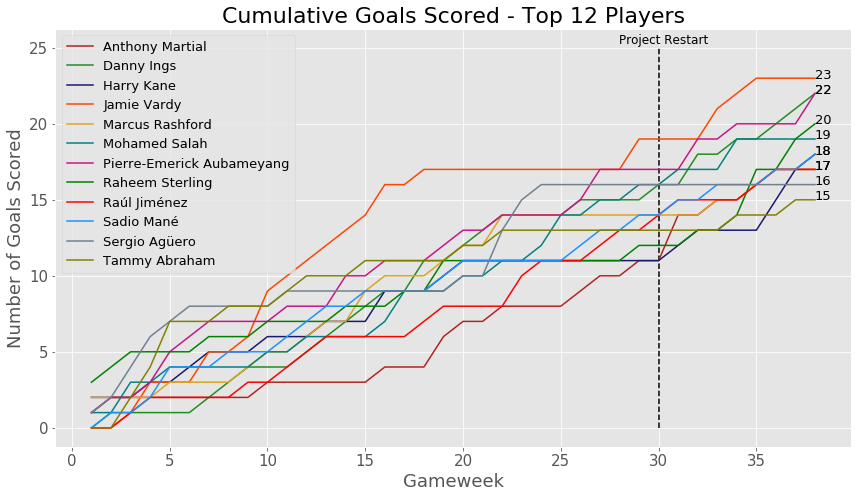

In [199]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
for i, t in enumerate(fifteen_plus_cumsum.keys()):
    ax.plot(range(1,39), fifteen_plus_cumsum[t], label=t, color=colors[i])
    ax.annotate(fifteen_plus_cumsum[t].values[-1], xy=(38, fifteen_plus_cumsum[t].values[-1]), fontsize=13)
ax.vlines(30, ymin=0, ymax=25, ls='--')
ax.annotate('Project Restart', xy=(28, 25.25), fontsize=12)
ax.set_title('Cumulative Goals Scored - Top 12 Players', fontsize=22)
ax.set_xlabel('Gameweek', fontsize=18)
ax.set_ylabel('Number of Goals Scored', fontsize=18)
plt.tick_params(labelsize=15)
ax.legend(fontsize=13)
plt.tight_layout(pad=1)
# plt.savefig('images/goals_scored_top12.png', dpi=100)

In [143]:
ten_plus_assists, ten_plus_assists_cs = make_player_stats_dict(all_players, 'assists', 10)

In [152]:
nine_plus_assists, nine_plus_assists_cs = make_player_stats_dict(all_players, 'assists', 9)

In [153]:
nine_plus_assists

{'Adama Traoré': 9,
 'Andrew Robertson': 12,
 'Anthony Martial': 9,
 'David Silva': 12,
 'Harvey Barnes': 10,
 'Heung-Min Son': 13,
 'Kevin De Bruyne': 23,
 'Mohamed Salah': 10,
 'Riyad Mahrez': 14,
 'Roberto Firmino': 9,
 'Sadio Mané': 10,
 'Trent Alexander-Arnold': 15,
 'Willian Borges Da Silva': 9}

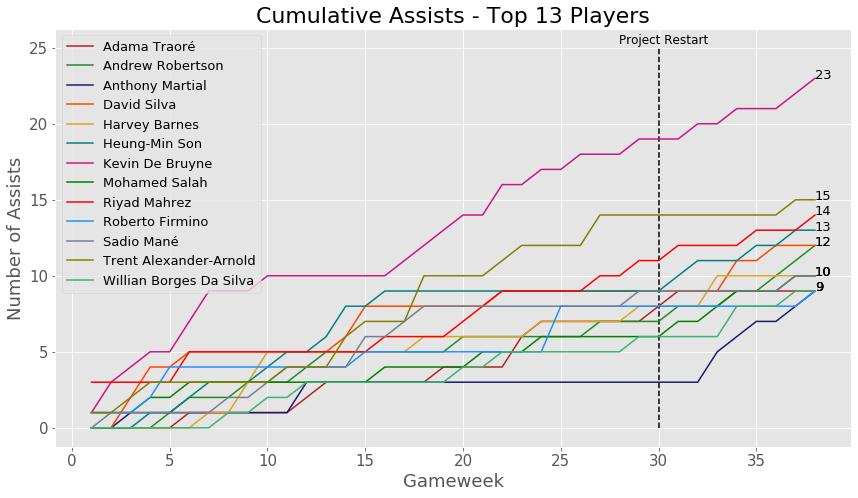

In [198]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
for i, t in enumerate(nine_plus_assists_cs.keys()):
    ax.plot(range(1,39), nine_plus_assists_cs[t], label=t, color=colors[i])
    ax.annotate(nine_plus_assists_cs[t].values[-1], xy=(38, nine_plus_assists_cs[t].values[-1]), fontsize=13)
ax.vlines(30, ymin=0, ymax=25, ls='--')
ax.annotate('Project Restart', xy=(28, 25.25), fontsize=12)
ax.set_title('Cumulative Assists - Top 13 Players', fontsize=22)
ax.set_xlabel('Gameweek', fontsize=18)
ax.set_ylabel('Number of Assists', fontsize=18)
plt.tick_params(labelsize=15)
ax.legend(fontsize=13)
plt.tight_layout(pad=1)
# plt.savefig('images/assists_top13.png', dpi=100)

In [192]:
def make_pre_post_stats_dict(stat_dict):
    pre_d = {}
    post_d = {}
    for player in stat_dict.keys():
        pre = []
        post = []
        for i in stat_dict[player][0:30]:
            if i is not None:
                pre.append(i)
        for j in stat_dict[player][30:]:
            if j is not None:
                post.append(j)
        pre_d[player] = pre
        post_d[player] = post
    return pre_d, post_d

In [193]:
pre_goals, post_goals = make_pre_post_stats_dict(top_12_goals)

In [194]:
p_values = {}
for player in pre_goals.keys():
    t, p = ttest_ind(pre_goals[player], post_goals[player], equal_var=True)
    p_values[player]= p

In [195]:
for t, p in p_values.items():
    if p <= .05:
        print(f"For a significance level of .05, {t}'s goals per game average change was statistically significant with a p-value of: {round(p, 3)}.\nTheir goals per game average went from {round(points[t][0:29].mean(), 3)} gpg to {round(points[t][30:].mean(), 3)} gpg.")
    if .05 <= p <= .1:
        print(f"For significance level of .1, {t}'s goals per game average change was statistically significant with a p-value of: {round(p, 3)}.\nTheir goals per game average went from {round(points[t][0:29].mean(), 3)} gpg to {round(points[t][30:].mean(), 3)} gpg.")

In [196]:
p_values

{'Anthony Martial': 0.32756447707167735,
 'Danny Ings': 0.3702903020126903,
 'Harry Kane': 0.25256301062600234,
 'Jamie Vardy': 0.5539048096984347,
 'Marcus Rashford': 0.4083087920377383,
 'Mohamed Salah': 0.4070943786579354,
 'Pierre-Emerick Aubameyang': 0.9522705132050457,
 'Raheem Sterling': 0.14081846511362822,
 'Raúl Jiménez': 0.683923830627494,
 'Sadio Mané': 0.9362170326258885,
 'Sergio Agüero': nan,
 'Tammy Abraham': 0.4157801682538823}